# Data Augmentation and Dropout

In the last chapter of the "CNN versus Cats and Dogs" saga, we saw that our model was overfitting the training data, thus its performance with the validation set was not good. In this notebook we will see how to overcome this problem by using two techniques: **data augmentation** and **dropout**. Once again, this example is taken from [1].

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/TC3007C/CNN/Cats and Dogs"
!pwd

Mounted at /content/drive
/content/drive/MyDrive/TC3007C/CNN/Cats and Dogs
/content/drive/MyDrive/TC3007C/CNN/Cats and Dogs


We will use the same libraries that we were working with.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

## Data Augmentation

Overfitting can be fixed in several ways, one of them being increasing the size of our training data. **Data augmentation** is a technique with which we do precisely this: add extra samples to the training set, but creating new samples from the data that we already have. 

Say we pick an image from the training set. We can modify this image in several ways and consider each modification a new sample. For instance, we can shift the image a random amount in a certain direction, we can rotate it by some angle, we can also do a horizontal flip, and so on. The `ImageDataGenerator` module helps us to do this, as you can observe in the next code cell. Notice that we apply data augmentation to the training data only, not the validation data.

In [3]:
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size = (150, 150),
																										batch_size = 20,
																										class_mode ='binary')

validation_generator = validation_datagen.flow_from_directory(
																										validation_dir,
                                                    target_size = (150,150),
																										batch_size =20,
																										class_mode= 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Dropout

**Dropout** is another technique that can be used to avoid overfitting. It is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Suppose that at a given layer we have the following output for a given input sample during training:

$$a^{(l)}=[0.2, 0.5, 1.3, 0.8, 1.1]$$

After applying dropout, this vector will have a few zero entries distributed at random, for example, 

$$\hat{a}^{(l)}=[0, 0.5, 1.3, 0, 1.1].$$

The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

Dropout can be added to our  CNN via the `Dropout` layer. In this example we will set the dropout rate to be equal to 0.5. Notice that we are using the same architecture that we employed before, the only difference being, precisely, the dropout layer.

In [4]:
model = models.Sequential([
                           Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                           MaxPooling2D((2, 2)),
                           Conv2D(64, (3, 3), activation='relu'),
                           MaxPooling2D((2, 2)),
                           Conv2D(128, (3, 3), activation='relu'),
                           MaxPooling2D((2, 2)),
                           Conv2D(128, (3, 3), activation='relu'),
                           MaxPooling2D((2, 2)),
                           Flatten(),
                           Dropout(0.5),
                           Dense(512, activation='relu'),
                           Dense(1, activation='sigmoid')
                          ])

Let us run the summary method.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

As you can see, `Dropout` does not add extra parameters to our CNN, but it prevents our model from overfitting our training data. 

Compilation of the model will be done as before.

In [7]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

Now we are ready for training the model. Same parameters as before, but we will increase the number of epochs.

In [9]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 656s 7s/step - loss: 0.6917 - acc: 0.5140 - val_loss: 0.6792 - val_acc: 0.5730
Epoch 2/100
100/100 [==============================] - 85s 853ms/step - loss: 0.6805 - acc: 0.5535 - val_loss: 0.6637 - val_acc: 0.5830
Epoch 3/100
100/100 [==============================] - 85s 850ms/step - loss: 0.6716 - acc: 0.5640 - val_loss: 0.6627 - val_acc: 0.5930
Epoch 4/100
100/100 [==============================] - 85s 851ms/step - loss: 0.6646 - acc: 0.5955 - val_loss: 0.6639 - val_acc: 0.5790
Epoch 5/100
100/100 [==============================] - 86s 862ms/step - loss: 0.6508 - acc: 0.6105 - val_loss: 0.6519 - val_acc: 0.6040
Epoch 6/100
100/100 [==============================] - 85s 853ms/step - loss: 0.6397 - acc: 0.6230 - val_loss: 0.6058 - val_acc: 0.6650
Epoch 7/100
100/100 [==============================] - 85s 851ms/step - loss: 0.6169 - acc: 0.6625 - val_loss: 0.6112 - val_acc: 0.6460
Epoch 8/100
100/100 [=============================

Good news! No overfitting! Notice that the accuracy in the validation set is above 80%, which is not bad. Keep in mind that this values gives us an estimate of how well our model will perform with data it has not seen before. Now let us plot the good news.

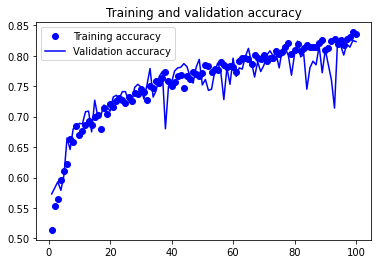

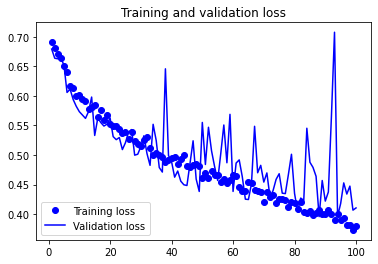

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Reference

[1] Chollet, Francois. *Deep learning with Python*. Simon and Schuster, 2021.